In [8]:
import matplotlib.pyplot as plt
def plot_attention_heads_comparison(attention_weights_dict, layer_name="layer_0", sample_idx=0, 
                                  heads_to_compare=None, token_type_ids=None, save_path=None, figsize=(20, 5)):
    """
    Plot attention weights from multiple heads in the same layer side by side
    
    Args:
        attention_weights_dict: Dictionary of attention weights by layer
        layer_name: Which layer to analyze
        sample_idx: Which sample from the batch to plot
        heads_to_compare: List of head indices to compare (if None, uses first 4 heads)
        token_type_ids: Optional token type information for labeling
        save_path: Optional path to save the plot
        figsize: Figure size
    """
    if layer_name not in attention_weights_dict:
        print(f"Layer {layer_name} not found. Available layers: {list(attention_weights_dict.keys())}")
        return
    
    attention_weights = attention_weights_dict[layer_name]
    num_heads = attention_weights.shape[1]
    
    if heads_to_compare is None:
        heads_to_compare = list(range(min(4, num_heads)))  # Show first 4 heads by default
    
    num_heads_to_plot = len(heads_to_compare)
    fig, axes = plt.subplots(1, num_heads_to_plot, figsize=figsize)
    
    if num_heads_to_plot == 1:
        axes = [axes]
    
    for i, head_idx in enumerate(heads_to_compare):
        if head_idx >= num_heads:
            print(f"Head {head_idx} not found. Layer has {num_heads} heads. Skipping.")
            continue
            
        attn_matrix = attention_weights[sample_idx, head_idx]
        
        sns.heatmap(attn_matrix, 
                    cmap='Reds', 
                    cbar=True,
                    square=True,
                    ax=axes[i],
                    cbar_kws={'label': 'Attention Weight'})
        
        axes[i].set_title(f'Head {head_idx}')
        axes[i].set_xlabel('Key Position')
        if i == 0:
            axes[i].set_ylabel('Query Position')
    
    plt.suptitle(f'Attention Heads Comparison - {layer_name.title()}, Sample {sample_idx}', fontsize=16)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Heads comparison plot saved to {save_path}")
    
    plt.show()

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import os
import numpy as np

def plot_attention_comparison(attention_weights_dict, layers_to_compare=None, sample_idx=0, head_idx=0,
                            token_type_ids=None, save_path=None, figsize=(16, 6)):
    """
    Plot attention weights from multiple layers side by side with one shared colorbar.
    """

    plt.rcParams['font.size'] = 16

    if layers_to_compare is None:
        layers_to_compare = sorted(attention_weights_dict.keys())
    
    num_layers = len(layers_to_compare)
    if num_layers == 0:
        print("No valid layers to plot.")
        return
    
    # Add extra width for colorbar space
    fig_width = figsize[0] + 2
    fig, axes = plt.subplots(1, num_layers, figsize=(fig_width, figsize[1]), constrained_layout=True)

    if num_layers == 1:
        axes = [axes]

    heatmaps = []
    count = 0
    for i, layer_name in enumerate(layers_to_compare):
        if layer_name not in attention_weights_dict:
            print(f"Layer {layer_name} not found. Skipping.")
            continue

        attention_weights = attention_weights_dict[layer_name]
        attn_matrix = attention_weights[sample_idx, head_idx]

        # Create heatmap WITHOUT its own colorbar
        colour_bar = False
        if count == 2:
            hm = sns.heatmap(attn_matrix, 
                            cmap='viridis', 
                            cbar=True,
                            square=True,
                            ax=axes[i], 
                            cbar_kws={'label': 'Attention Weight'})
        else:
            hm = sns.heatmap(attn_matrix, 
                            cmap='viridis', 
                            cbar=False,
                            square=True,
                            ax=axes[i])
        heatmaps.append(hm)

        seq_len = attn_matrix.shape[0]

        # Ticks every 4 positions
        axes[i].xaxis.set_major_locator(MultipleLocator(4))
        axes[i].yaxis.set_major_locator(MultipleLocator(4))

        # Explicitly set ticks to 0..N-1 every 4
        axes[i].set_xticks(np.arange(0, seq_len, 4))
        axes[i].set_yticks(np.arange(0, seq_len, 4))
        axes[i].set_xticklabels(np.arange(0, seq_len, 4))
        axes[i].set_yticklabels(np.arange(0, seq_len, 4))

        # Axis labels
        axes[i].set_xlabel('Key Position')
        if i == 0:
            axes[i].set_ylabel('Query Position')

        # Replace underscores with spaces in title
        pretty_name = layer_name.replace('_', ' ').title()
        axes[i].set_title(pretty_name)

        count += 1
    
    # Add ONE colorbar on the right
       # Add ONE colorbar on the right
    '''if heatmaps:
        cbar = fig.colorbar(heatmaps[0].collections[0], ax=axes, location="right", pad=0, shrink=0.9)
        cbar.set_label('Attention Weight')
    '''

    # Add a figure title with some whitespace
    plt.suptitle(f'Fine-tuned Model Attention Scores', fontsize=24, y=1.08)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Comparison plot saved to {save_path}")
    
    plt.show()


In [ ]:
'''def plot_attention_comparison(attention_weights_dict1, attention_weights_dict2, 
                              title1="Attention Weights Set 1", 
                              title2="Attention Weights Set 2", 
                              layers_to_compare=None, 
                              sample_idx=0, 
                              head_idx=0,
                              save_path=None, 
                              figsize=(18, 14)):
    """
    Plot attention weights from two sets of layers side by side, stacked in two rows.
    
    Args:
        attention_weights_dict1 (dict): Dictionary of attention weights for the first set.
        attention_weights_dict2 (dict): Dictionary of attention weights for the second set.
        title1 (str): Title for the first row of plots.
        title2 (str): Title for the second row of plots.
        layers_to_compare (list): List of layer names to compare. If None, all common layers are used.
        sample_idx (int): The index of the sample to plot.
        head_idx (int): The index of the attention head to plot.
        save_path (str): Path to save the plot. If None, the plot is displayed.
        figsize (tuple): Figure size (width, height). Note that the height is for two rows of plots.
    """
    
    # Set the font size for the plots
    plt.rcParams['font.size'] = 18

    # Determine layers to compare
    if layers_to_compare is None:
        layers_to_compare = sorted(list(set(attention_weights_dict1.keys()) & set(attention_weights_dict2.keys())))
    
    num_layers = len(layers_to_compare)
    if num_layers == 0:
        print("No common layers to plot.")
        return

    # Create a 2xN grid of subplots for the two sets of weights
    # We add extra width for the shared colorbar
    fig, axes = plt.subplots(2, num_layers, figsize=(figsize[0] + 2, figsize[1]), constrained_layout=True)

    # Handle the case of a single layer to avoid indexing errors
    if num_layers == 1:
        axes = axes.reshape(2, 1)

    # Dictionary to hold the maximum weight across all plots for a shared colorbar
    max_attn_weight = 0.0

    # --- Plot the first set of attention weights ---
    for i, layer_name in enumerate(layers_to_compare):
        if layer_name not in attention_weights_dict1:
            print(f"Layer {layer_name} not found in first dictionary. Skipping.")
            continue
        
        attention_weights = attention_weights_dict1[layer_name]
        attn_matrix = attention_weights[sample_idx, head_idx]
        
        # Update the max weight for the shared colorbar
        max_attn_weight = max(max_attn_weight, np.max(attn_matrix))

        # Create heatmap
        sns.heatmap(attn_matrix, 
                    cmap='viridis', 
                    cbar=False,
                    square=True,
                    ax=axes[0, i])
        
        # Set titles and labels for the first row
        axes[0, i].set_title(f'{layer_name.title()}')
        if i == 0:
            axes[0, i].set_ylabel('Query Position')
            
        # Set ticks for the first row
        seq_len = attn_matrix.shape[0]
        axes[0, i].xaxis.set_major_locator(MultipleLocator(4))
        axes[0, i].yaxis.set_major_locator(MultipleLocator(4))
        axes[0, i].set_xticklabels(np.arange(0, seq_len, 4))
        axes[0, i].set_yticklabels(np.arange(0, seq_len, 4))
        axes[0, i].set_xlabel('Key Position')

    # Add a main title for the first row of plots
    fig.text(0.5, 0.98, title1, ha='center', va='top', fontsize=22)

    # --- Plot the second set of attention weights ---
    for i, layer_name in enumerate(layers_to_compare):
        if layer_name not in attention_weights_dict2:
            print(f"Layer {layer_name} not found in second dictionary. Skipping.")
            continue
            
        attention_weights = attention_weights_dict2[layer_name]
        attn_matrix = attention_weights[sample_idx, head_idx]

        # Update the max weight for the shared colorbar
        max_attn_weight = max(max_attn_weight, np.max(attn_matrix))

        # Create heatmap with a shared colorbar on the last plot of the row
        if i == num_layers - 1:
            hm = sns.heatmap(attn_matrix, 
                            cmap='viridis', 
                            cbar=True,
                            cbar_kws={'label': 'Attention Weight'},
                            vmin=0, vmax=max_attn_weight,
                            square=True,
                            ax=axes[1, i])
        else:
            hm = sns.heatmap(attn_matrix, 
                            cmap='viridis', 
                            cbar=False,
                            vmin=0, vmax=max_attn_weight,
                            square=True,
                            ax=axes[1, i])
        
        # Set titles and labels for the second row
        axes[1, i].set_title(f'{layer_name.title()}')
        if i == 0:
            axes[1, i].set_ylabel('Query Position')
        
        # Set ticks for the second row
        seq_len = attn_matrix.shape[0]
        axes[1, i].xaxis.set_major_locator(MultipleLocator(4))
        axes[1, i].yaxis.set_major_locator(MultipleLocator(4))
        axes[1, i].set_xticklabels(np.arange(0, seq_len, 4))
        axes[1, i].set_yticklabels(np.arange(0, seq_len, 4))
        axes[1, i].set_xlabel('Key Position')

    # Add a main title for the second row of plots
    fig.text(0.5, 0.48, title2, ha='center', va='top', fontsize=22)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Comparison plot saved to {save_path}")
    
    plt.show()'''

In [ ]:
'''def plot_attention_comparison(attention_weights_dict1, attention_weights_dict2, 
                              title1="Attention Weights Set 1", 
                              title2="Attention Weights Set 2", 
                              layers_to_compare=None, 
                              sample_idx=0, 
                              head_idx=0,
                              save_path=None, 
                              figsize=(18, 14)):
    """
    Plot attention weights from two sets of layers side by side, stacked in two rows.
    """
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MultipleLocator
    import seaborn as sns
    import numpy as np

    # Set the font size for the plots
    plt.rcParams['font.size'] = 18

    # Determine layers to compare
    if layers_to_compare is None:
        layers_to_compare = sorted(list(set(attention_weights_dict1.keys()) & set(attention_weights_dict2.keys())))
    
    num_layers = len(layers_to_compare)
    if num_layers == 0:
        print("No common layers to plot.")
        return

    # Create a 2xN grid of subplots for the two sets of weights
    fig, axes = plt.subplots(2, num_layers, figsize=(figsize[0] + 2, figsize[1]), constrained_layout=True)

    # Handle the case of a single layer to avoid indexing errors
    if num_layers == 1:
        axes = axes.reshape(2, 1)

    # Dictionary to hold the maximum weight across all plots for a shared colorbar
    max_attn_weight = 0.0

    # --- Plot the first set of attention weights ---
    for j, layer_name in enumerate(layers_to_compare):
        if layer_name not in attention_weights_dict1:
            print(f"Layer {layer_name} not found in first dictionary. Skipping.")
            continue
        
        attention_weights = attention_weights_dict1[layer_name]
        attn_matrix = attention_weights[sample_idx, head_idx]
        
        # Update the max weight for the shared colorbar
        max_attn_weight = max(max_attn_weight, np.max(attn_matrix))

        # Create heatmap
        if j == num_layers - 1:
            hm = sns.heatmap(attn_matrix, 
                            cmap='viridis', 
                            cbar=True,
                            cbar_kws={'label': 'Attention Weight'},
                            vmin=0, vmax=max_attn_weight,
                            square=True,
                            ax=axes[1, j])
        else:
            hm = sns.heatmap(attn_matrix, 
                            cmap='viridis', 
                            cbar=False,
                            vmin=0, vmax=max_attn_weight,
                            square=True,
                            ax=axes[1, j])
        
        # Set titles and labels for the first row (with padding)
        axes[0, j].set_title(f'{layer_name.title()}', pad=20)
        if j == 0:
            axes[0, j].set_ylabel('Query Position')
        
        # Set ticks for the first row
        seq_len = attn_matrix.shape[0]
        axes[0, j].xaxis.set_major_locator(MultipleLocator(4))
        axes[0, j].yaxis.set_major_locator(MultipleLocator(4))
        axes[0, j].set_xticklabels(np.arange(0, seq_len, 4))
        axes[0, j].set_yticklabels(np.arange(0, seq_len, 4))
        axes[0, j].set_xlabel('Key Position')

    # Add a main title for the first row of plots (moved higher)
    fig.text(0.5, 1.02, title1, ha='center', va='top', fontsize=22)

    # --- Plot the second set of attention weights ---
    for i, layer_name in enumerate(layers_to_compare):
        if layer_name not in attention_weights_dict2:
            print(f"Layer {layer_name} not found in second dictionary. Skipping.")
            continue
            
        attention_weights = attention_weights_dict2[layer_name]
        attn_matrix = attention_weights[sample_idx, head_idx]

        # Update the max weight for the shared colorbar
        max_attn_weight = max(max_attn_weight, np.max(attn_matrix))

        # Create heatmap with a shared colorbar on the last plot of the row
        if i == num_layers - 1:
            hm = sns.heatmap(attn_matrix, 
                            cmap='viridis', 
                            cbar=True,
                            cbar_kws={'label': 'Attention Weight'},
                            vmin=0, vmax=max_attn_weight,
                            square=True,
                            ax=axes[1, i])
        else:
            hm = sns.heatmap(attn_matrix, 
                            cmap='viridis', 
                            cbar=False,
                            vmin=0, vmax=max_attn_weight,
                            square=True,
                            ax=axes[1, i])
        
        # Set titles and labels for the second row (with padding)
        axes[1, i].set_title(f'{layer_name.title()}', pad=20)
        if i == 0:
            axes[1, i].set_ylabel('Query Position')
        
        # Set ticks for the second row
        seq_len = attn_matrix.shape[0]
        axes[1, i].xaxis.set_major_locator(MultipleLocator(4))
        axes[1, i].yaxis.set_major_locator(MultipleLocator(4))
        axes[1, i].set_xticklabels(np.arange(0, seq_len, 4))
        axes[1, i].set_yticklabels(np.arange(0, seq_len, 4))
        axes[1, i].set_xlabel('Key Position')

    # Add a main title for the second row of plots (moved lower)
    fig.text(0.5, 0.50, title2, ha='center', va='top', fontsize=22)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Comparison plot saved to {save_path}")
    
    plt.show()
'''

In [34]:
from figures.plot_nice import MultiModalRegressionTransformerWithWeights
from model.decoder import MultiModalRegressionTransformer
import torch
original_model = MultiModalRegressionTransformer(384, 26, 64, 28, 6, 16, 5, 0)
original_model.load_state_dict(torch.load('val_loss0.1074_DPR_0.1_MP_0.3_DM_64_TL_5_heads_16.pth'))

FP_model = MultiModalRegressionTransformer(384, 26, 64, 28, 6, 16, 5, 0)
FP_model.load_state_dict(torch.load('FP_model.pt'))

#MultiModalRegressionTransformerWithWeights()

<All keys matched successfully>

In [36]:
from figures.plot_nice import create_modified_model_from_original, save_attention_weights
modified_model = create_modified_model_from_original(original_model, 'all')
fp_mod = create_modified_model_from_original(FP_model, 'all')
from model.dataset import load_dataset
from model.config import COLUMN_DICT, MAX_SEQUENCE_LENGTH, TOKEN_TYPE_VOCAB
from model.collate import create_collate_fn
from torch.utils.data import DataLoader


In [4]:

data_path = 'data/train_set.csv'

dataset, chemberta_dimension = load_dataset(data_path, COLUMN_DICT, MAX_SEQUENCE_LENGTH)
    
    # Create collate function
configured_collate_fn = create_collate_fn(TOKEN_TYPE_VOCAB, 0)
    
    # Create DataLoader
dataloader = DataLoader(
    dataset, 
    batch_size=1, 
    shuffle=False,  # Usually no shuffling for inference
    collate_fn=configured_collate_fn
)




Data loaded from data/train_set.csv. Shape: (8850, 26)
ChemBERTa loaded successfully with hidden size: 384


dict_keys(['SMILES_fps', 'word_tokens_ref', 'values_ref', 'token_type_ids', 'attention_mask', 'masked_lm_labels', 'token_type_vocab'])
Layers captured: ['layer_0', 'layer_1', 'layer_2', 'layer_3', 'layer_4']
Layers captured: ['layer_0', 'layer_1', 'layer_2', 'layer_3', 'layer_4']


c:\Users\gkg124\AppData\Local\miniconda3\envs\marketing_masters\lib\site-packages\torch\nn\functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


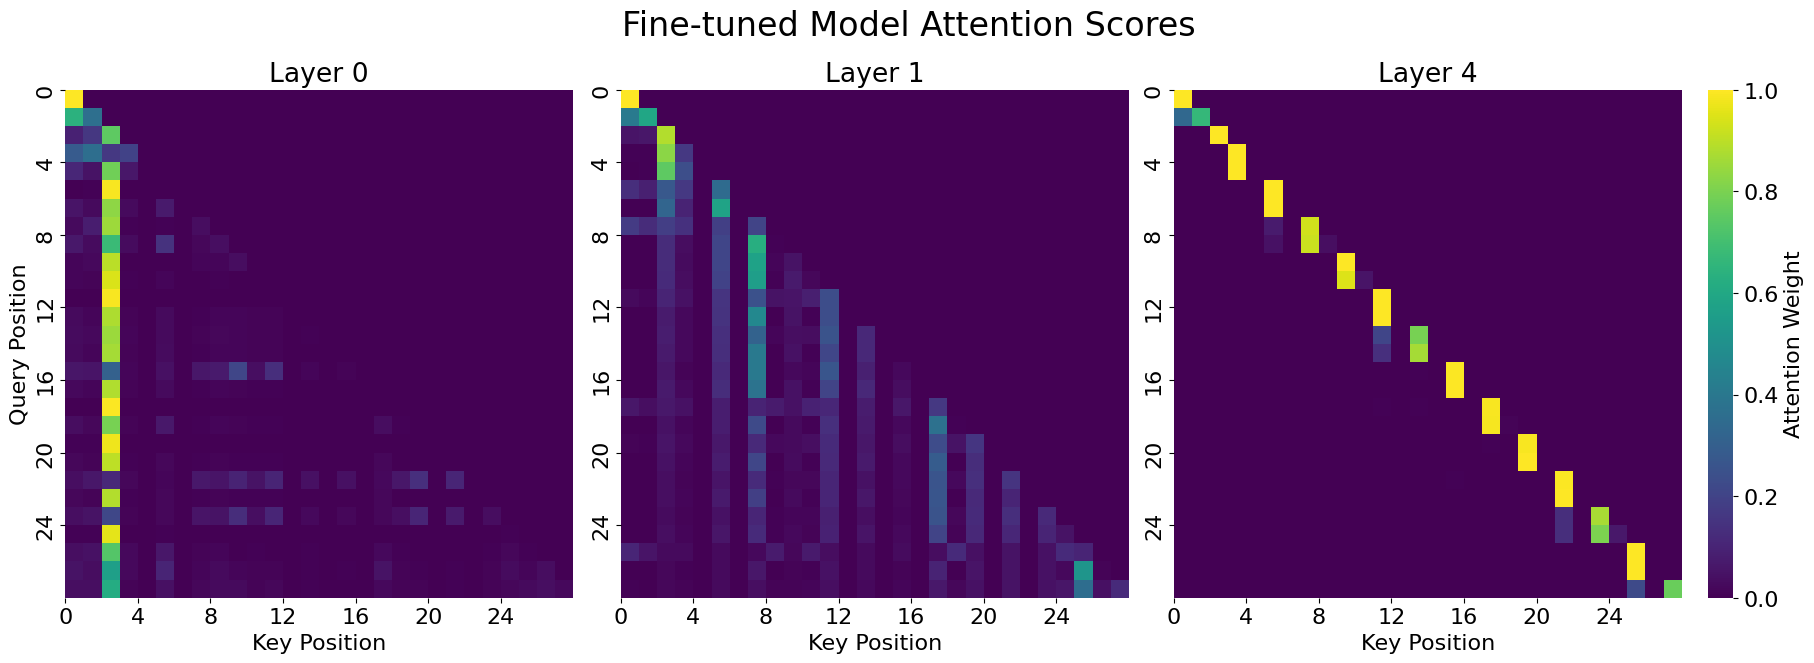

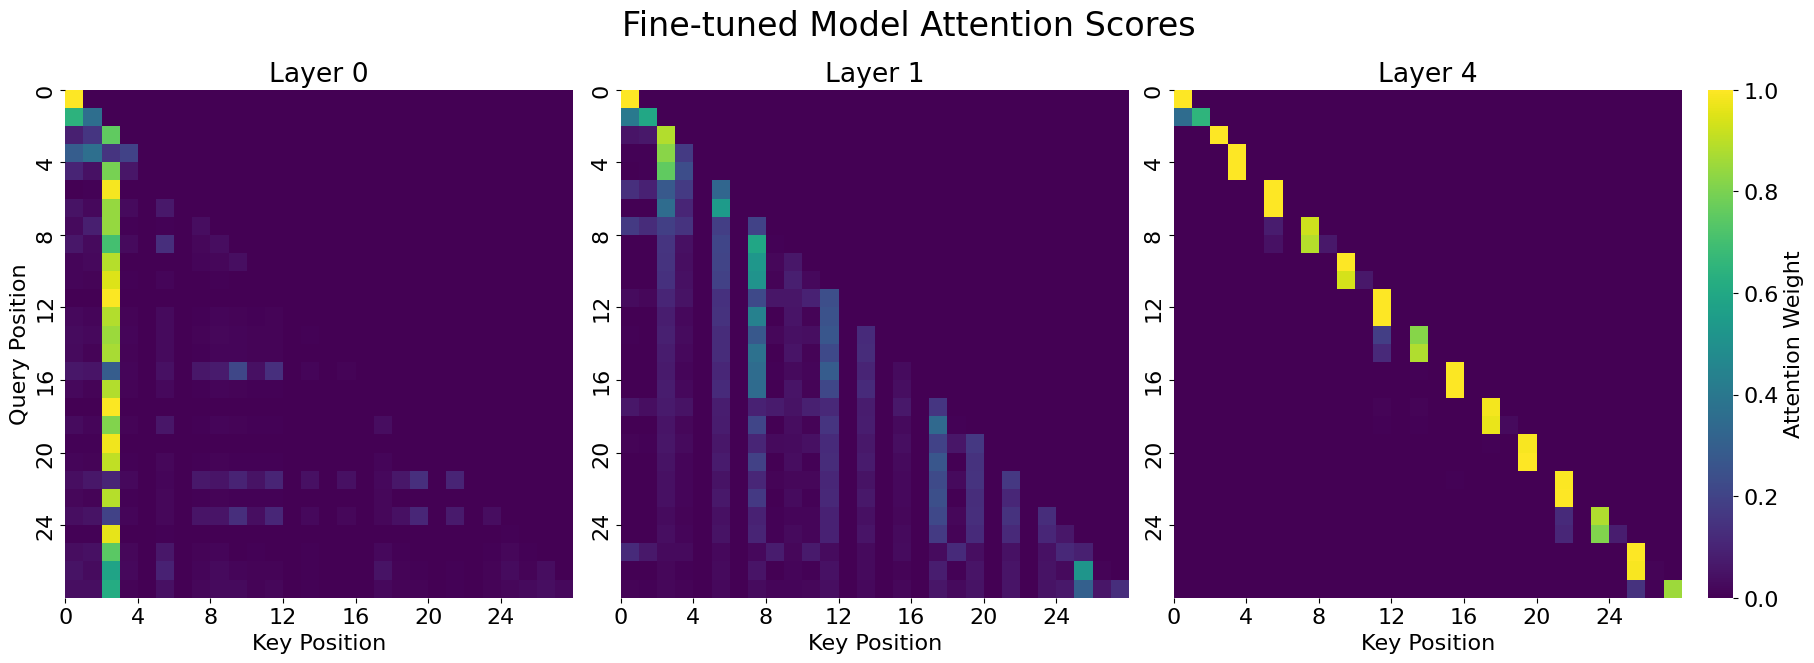

'plot_attention_comparison(attention_weights, fp_weight, \n                              title1="Pretrained Model", \n                              title2="Fine-tuned Model", \n                              layers_to_compare=[\'layer_0\', \'layer_1\', \'layer_4\'], \n                              sample_idx=0, \n                              head_idx=3,\n                              save_path=None, \n                              figsize=(16, 12))'

In [37]:
#carboxylic_acid,CC(=O)O,beta,0.048067142014144595,SA,2.5950361151050414,fn,-0.896042866699664,ET30,1.3790523498227498,pi_star,0.19054598691392477,delta,-0.3757147872390322,N_mol_cm3,1.5719328599406628,n,-1.0855363021119804,SdP,0.4884623095368899,SP,-0.8755939101280419,alpha,2.0072339636690737,SB,-0.09128940826057937


for index, batch in enumerate(dataloader):
    if index == 10:
        sample_input = batch
sample_input['token_type_vocab'] = TOKEN_TYPE_VOCAB
print(sample_input.keys())

attention_weights = save_attention_weights(modified_model, sample_input)
fp_weight = save_attention_weights(fp_mod, sample_input)
head = 3
plot_attention_comparison(attention_weights, layers_to_compare=['layer_0', 'layer_1', 'layer_4'], head_idx=head)
plot_attention_comparison(fp_weight, layers_to_compare=['layer_0', 'layer_1', 'layer_4'], head_idx=head)

'''plot_attention_comparison(attention_weights, fp_weight, 
                              title1="Pretrained Model", 
                              title2="Fine-tuned Model", 
                              layers_to_compare=['layer_0', 'layer_1', 'layer_4'], 
                              sample_idx=0, 
                              head_idx=3,
                              save_path=None, 
                              figsize=(16, 12))'''

In [56]:
import pandas as pd

path = 'data/full_extracted_table.csv'

df = pd.read_csv(path)

for i in df.columns.to_list():
    print(i, sum(df[i].isna()))
    print(min(df[i]), max(df[i]))

solvent 0
(trifluoromethyl)benzene -butyrolactone
solvent smiles 0
C(#N)C(Cl)(Cl)Cl c1ccc2c(c1)CCCC2
ET(30) 43
30.9 63.1
α 71
0.0 1.96
β 71
0.0 1.43
π* 77
-0.08 1.09
SA 30
0.0 1.062
SB 30
0.014 1.0
SP 30
0.339 1.0
SdP 30
0.0 1.454
N (mol/cm3) 0
0.0034 0.05541
n 36
1.275 1.627
f(n) 36
0.023974 0.35444
δ 84
13.9 47.9
